In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Dataset

In [2]:
!wget https://raw.githubusercontent.com/ChaiyotMix/Test/main/Final%20Project%20dataset/Bank_Personal_Loan_Modelling1.csv

--2022-12-05 12:57:21--  https://raw.githubusercontent.com/ChaiyotMix/Test/main/Final%20Project%20dataset/Bank_Personal_Loan_Modelling1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205669 (201K) [text/plain]
Saving to: ‘Bank_Personal_Loan_Modelling1.csv.2’

Bank_Personal_Loan_ 100%[===================>] 200.85K  --.-KB/s    in 0.02s   

2022-12-05 12:57:22 (10.7 MB/s) - ‘Bank_Personal_Loan_Modelling1.csv.2’ saved [205669/205669]



In [91]:
df = pd.read_csv('Bank_Personal_Loan_Modelling1.csv')

In [92]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [93]:
# Education
# 1 = Undergrad 
# 2 = Graduate
# 3 = Advanced/Professional

In [94]:
np.shape(df)

(5000, 14)

In [95]:
df_ref = df.copy()

In [96]:
(df["Personal Loan"] == 1 ).value_counts()

False    4520
True      480
Name: Personal Loan, dtype: int64

# Preparation

In [97]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [99]:
df = df.replace({'Education' : {1 : 'Undergrad', 2 : 'Graduate', 3 : 'Advanced/Professional'}})

In [100]:
del df['ID']
del df['ZIP Code']

In [101]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,Undergrad,0,1,0,0,0,0
1,45,19,34,3,1.5,Undergrad,0,1,0,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,1,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   object 
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 468.9+ KB


In [103]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,Undergrad,0,1,0,0,0,0
1,45,19,34,3,1.5,Undergrad,0,1,0,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,1,0


In [104]:
df_corr = df.corr()

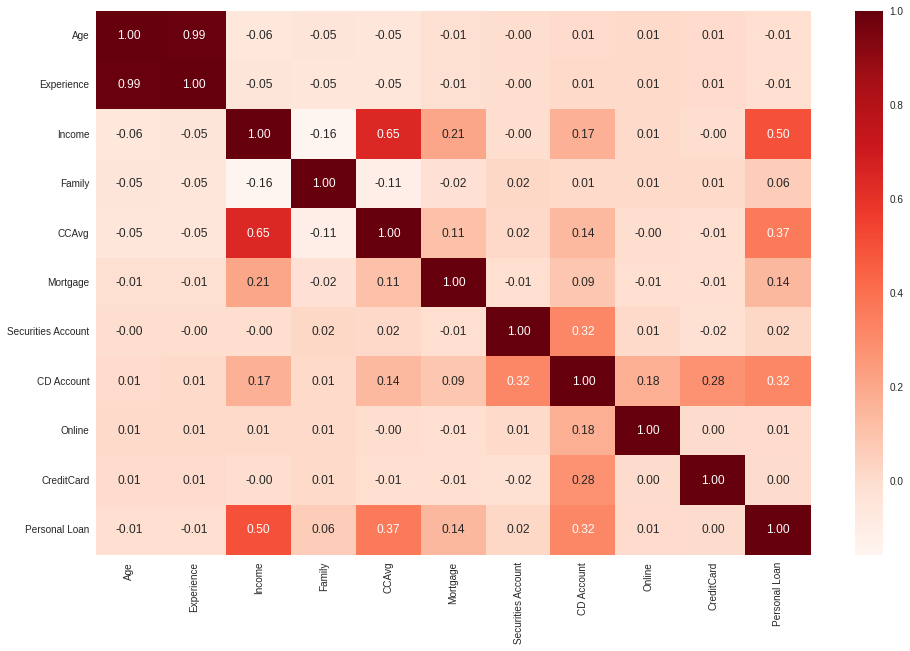

In [105]:
plt.figure(figsize = (16,10))
sns.heatmap(df_corr, cmap='Reds', annot=True, fmt='.2f')

# Split the data

In [106]:
from sklearn.model_selection import train_test_split
df_full_train , df_test = train_test_split(df , test_size = 0.2 , random_state= 36)
len(df_full_train), len(df_test)

(4000, 1000)

In [107]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Models Selected

In [20]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
from pycaret.utils import enable_colab
from pycaret.classification import *

In [110]:
exp_clf102 = setup(data = df_full_train, target = 'Personal Loan', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['Age'],
                  log_experiment = True, experiment_name = 'credit1')

,Description,Value
0,session_id,123
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4000, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Personal Loan',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('dummy', Dummify(target='Personal Loan')),
          

In [111]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9879,0.9975,0.8720,0.9913,0.9259,0.9193,0.9227,0.301
lightgbm,Light Gradient Boosting Machine,0.9871,0.9970,0.8762,0.9793,0.9226,0.9157,0.9186,0.154
gbc,Gradient Boosting Classifier,0.9857,0.9970,0.8882,0.9501,0.9165,0.9087,0.9103,0.315
dt,Decision Tree Classifier,0.9854,0.9577,0.9240,0.9152,0.9183,0.9103,0.9111,0.017
et,Extra Trees Classifier,0.9775,0.9908,0.7603,0.9830,0.8542,0.8424,0.8523,0.273
ada,Ada Boost Classifier,0.9721,0.9771,0.7688,0.9076,0.8303,0.8153,0.8198,0.160
lr,Logistic Regression,0.9639,0.9706,0.6731,0.9022,0.7698,0.7507,0.7608,0.356
svm,SVM - Linear Kernel,0.9625,0.0000,0.6965,0.8787,0.7676,0.7477,0.7589,0.025
knn,K Neighbors Classifier,0.9511,0.9097,0.4578,0.9900,0.6209,0.5990,0.6526,0.067
lda,Linear Discriminant Analysis,0.9436,0.9598,0.5175,0.7768,0.6181,0.5892,0.6049,0.024


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123,

## Logistic Regression

In [112]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9464,0.9583,0.5600,0.7778,0.6512,0.6230,0.6329
1,0.9679,0.9678,0.6800,0.9444,0.7907,0.7738,0.7861
2,0.9714,0.9900,0.6800,1.0000,0.8095,0.7947,0.8120
3,0.9750,0.9769,0.7600,0.9500,0.8444,0.8310,0.8372
4,0.9679,0.9592,0.6800,0.9444,0.7907,0.7738,0.7861
5,0.9536,0.9647,0.6800,0.7727,0.7234,0.6982,0.6999
6,0.9643,0.9589,0.6400,0.9412,0.7619,0.7434,0.7595
7,0.9679,0.9645,0.6800,0.9444,0.7907,0.7738,0.7861
8,0.9679,0.9935,0.7308,0.9048,0.8085,0.7912,0.7966


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [113]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.9576,0.6000,0.7895,0.6818,0.6552,0.6625
1,0.9750,0.9680,0.7600,0.9500,0.8444,0.8310,0.8372
2,0.9750,0.9892,0.7600,0.9500,0.8444,0.8310,0.8372
3,0.9750,0.9768,0.7600,0.9500,0.8444,0.8310,0.8372
4,0.9643,0.9584,0.6800,0.8947,0.7727,0.7537,0.7621
5,0.9607,0.9658,0.7600,0.7917,0.7755,0.7540,0.7542
6,0.9607,0.9575,0.6800,0.8500,0.7556,0.7345,0.7399
7,0.9714,0.9642,0.7200,0.9474,0.8182,0.8030,0.8119
8,0.9714,0.9935,0.7692,0.9091,0.8333,0.8178,0.8212


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [114]:
print(tuned_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


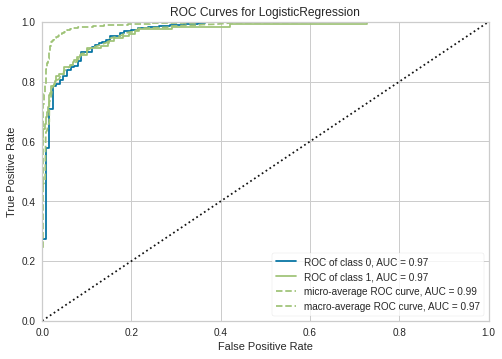

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [115]:
plot_model(tuned_lr, plot = 'auc')

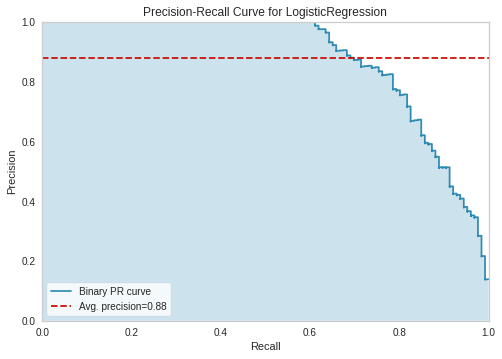

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [116]:
plot_model(tuned_lr, plot = 'pr')

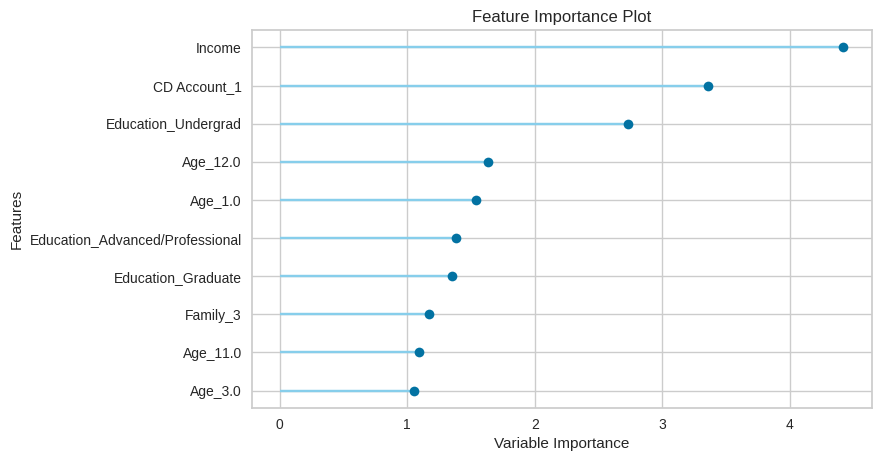

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [117]:
plot_model(tuned_lr, plot='feature')

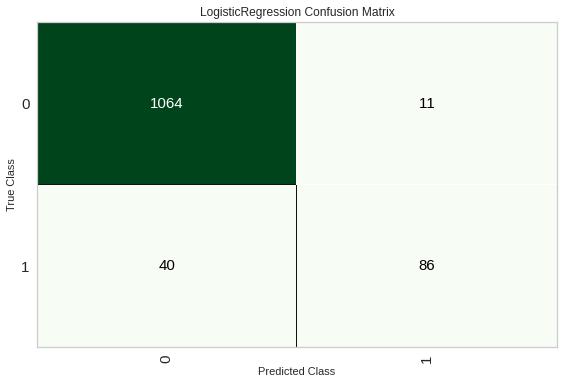

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [118]:
plot_model(tuned_lr, plot = 'confusion_matrix')

## Random Forest Classifier

In [119]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9821,0.9968,0.8400,0.9545,0.8936,0.8839,0.8861
1,0.9893,0.9963,0.9200,0.9583,0.9388,0.9329,0.9331
2,0.9964,0.9998,0.9600,1.0000,0.9796,0.9776,0.9779
3,0.9893,0.9994,0.8800,1.0000,0.9362,0.9303,0.9326
4,0.9893,0.9983,0.8800,1.0000,0.9362,0.9303,0.9326
5,0.9786,0.9979,0.7600,1.0000,0.8636,0.8522,0.8617
6,0.9929,0.9964,0.9200,1.0000,0.9583,0.9544,0.9554
7,0.9786,0.9927,0.7600,1.0000,0.8636,0.8522,0.8617
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [120]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9821,0.9962,0.8400,0.9545,0.8936,0.8839,0.8861
1,0.9786,0.9787,0.9600,0.8276,0.8889,0.8771,0.8801
2,0.9929,0.9793,0.9600,0.9600,0.9600,0.9561,0.9561
3,0.9821,0.9970,0.8400,0.9545,0.8936,0.8839,0.8861
4,0.9893,0.9580,0.8800,1.0000,0.9362,0.9303,0.9326
5,0.9821,0.9766,0.8000,1.0000,0.8889,0.8793,0.8858
6,0.9857,0.9965,0.9200,0.9200,0.9200,0.9122,0.9122
7,0.9750,0.9873,0.8000,0.9091,0.8511,0.8375,0.8395
8,0.9857,0.9989,0.9615,0.8929,0.9259,0.9180,0.9188


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [121]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


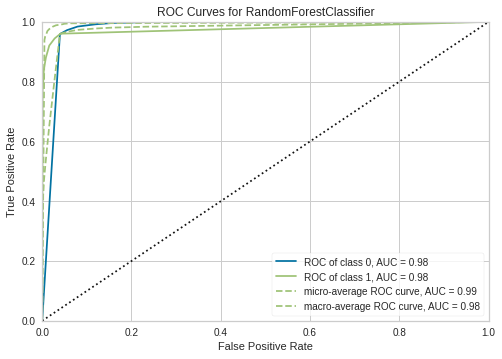

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [122]:
plot_model(tuned_rf, plot = 'auc')

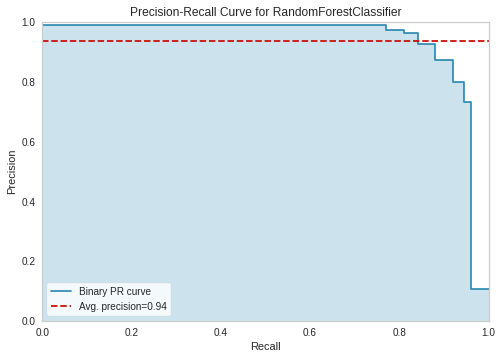

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [123]:
plot_model(tuned_rf, plot = 'pr')

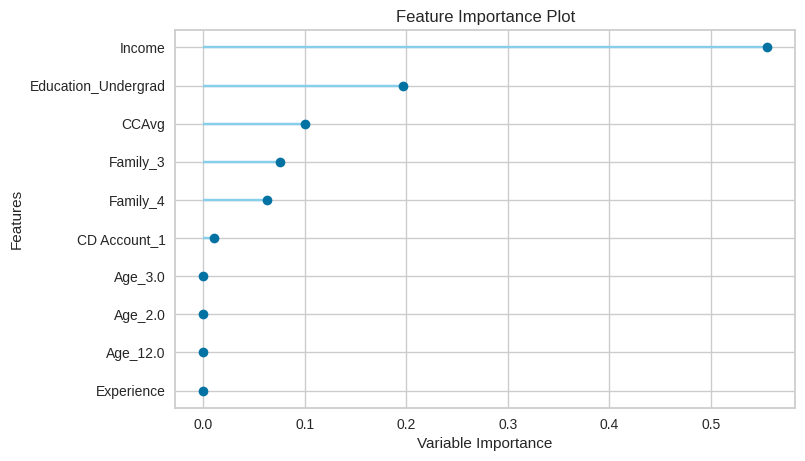

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [124]:
plot_model(tuned_rf, plot='feature')

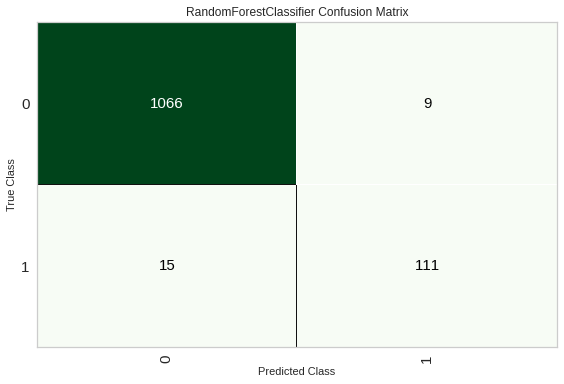

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [125]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# Models Prediction

## Logistic Regression

In [126]:
predict_model(tuned_lr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9575,0.968,0.6825,0.8866,0.7713,0.7483,0.7561


In [127]:
unseen_predictions = predict_model(tuned_lr, data=df_test)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.972,0.9736,0.7573,0.963,0.8478,0.8326,0.8399


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Label,Score
0,29,4,182,1,3.7,Advanced/Professional,0,0,0,1,0,1,1,0.9488
1,40,15,171,2,3.3,Undergrad,0,0,0,1,0,0,0,0.8992
2,44,19,61,3,2.7,Graduate,0,0,0,0,0,0,0,0.9717
3,27,0,38,4,1.0,Advanced/Professional,154,0,0,1,0,0,0,0.9995
4,29,3,121,2,1.3,Undergrad,0,0,0,0,0,0,0,0.9883


## Random Forest Classifier

In [128]:
predict_model(tuned_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.98,0.977,0.881,0.925,0.9024,0.8913,0.8916


In [129]:
unseen_predictions = predict_model(tuned_rf, data=df_test)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.991,0.9893,0.9223,0.9896,0.9548,0.9498,0.9505


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Label,Score
0,29,4,182,1,3.7,Advanced/Professional,0,0,0,1,0,1,1,1.0
1,40,15,171,2,3.3,Undergrad,0,0,0,1,0,0,0,1.0
2,44,19,61,3,2.7,Graduate,0,0,0,0,0,0,0,1.0
3,27,0,38,4,1.0,Advanced/Professional,154,0,0,1,0,0,0,1.0
4,29,3,121,2,1.3,Undergrad,0,0,0,0,0,0,0,1.0


# Conclusion

The two models that have been selected are 1. Logistic Regression and 2.Random Forest Classifier. From the experiment, it was found that the Random Forest Classifier Model can provide better performance than the Logistic Regression Model. Improved scores such as Accuracy, AUC, Precision, Recall and F1 Score make this model the most efficient.